# Dates and Times in Pandas

To conclude this session, we'll apply everything we've learned about working with dates and times in standard Python to working with dates and times in Pandas. With additional information about each bike ride, such as what station it started and stopped at and whether or not the rider had a yearly membership, we'll be able to dig much more deeply into the bike trip data. In this notebook, we'll cover powerful Pandas operations, such as grouping and plotting results by time.

## Reading date and time data in Pandas

### Loading a csv file in Pandas

The 202006-capitalbikeshare-tripdata.csv file covers the June'20 rides of the Capital Bikeshare.

In [1]:
# Import pandas
import pandas as pd

# Load CSV into the rides variable
rides = pd.read_csv('capitalbikeshare.csv')

# Print the dataset and info
print(rides.head())
print(rides.info())

            ride_id rideable_type           started_at             ended_at  \
0  16A86B048B01DE6F   docked_bike  2020-06-10 20:20:36  2020-06-10 20:27:28   
1  661EA082175DB7E9   docked_bike  2020-06-23 06:31:23  2020-06-23 06:58:35   
2  15C659A06C439B74   docked_bike  2020-06-06 11:49:29  2020-06-06 11:49:38   
3  59AD75CFBF96DEC1   docked_bike  2020-06-06 11:52:51  2020-06-06 12:21:49   
4  06F6881BEFCFC106   docked_bike  2020-06-07 15:25:45  2020-06-07 17:15:28   

                       start_station_name  start_station_id  \
0                     Edgewood Rec Center             642.0   
1                 Wisconsin Ave & O St NW             289.0   
2                          19th & K St NW             269.0   
3                          19th & K St NW             269.0   
4  37th & O St NW / Georgetown University             152.0   

                 end_station_name  end_station_id  start_lat  start_lng  \
0          Rhode Island Ave Metro           368.0  38.924144 -77.002098

In [2]:
# Load CSV into the rides variable
rides = pd.read_csv('capitalbikeshare.csv', parse_dates = ['started_at', 'ended_at'])

# Print the dataset and info
print(rides.head())
print(rides.info())

            ride_id rideable_type          started_at            ended_at  \
0  16A86B048B01DE6F   docked_bike 2020-06-10 20:20:36 2020-06-10 20:27:28   
1  661EA082175DB7E9   docked_bike 2020-06-23 06:31:23 2020-06-23 06:58:35   
2  15C659A06C439B74   docked_bike 2020-06-06 11:49:29 2020-06-06 11:49:38   
3  59AD75CFBF96DEC1   docked_bike 2020-06-06 11:52:51 2020-06-06 12:21:49   
4  06F6881BEFCFC106   docked_bike 2020-06-07 15:25:45 2020-06-07 17:15:28   

                       start_station_name  start_station_id  \
0                     Edgewood Rec Center             642.0   
1                 Wisconsin Ave & O St NW             289.0   
2                          19th & K St NW             269.0   
3                          19th & K St NW             269.0   
4  37th & O St NW / Georgetown University             152.0   

                 end_station_name  end_station_id  start_lat  start_lng  \
0          Rhode Island Ave Metro           368.0  38.924144 -77.002098   
1       

In [3]:
# Load CSV into the rides variable
rides = pd.read_csv('capitalbikeshare.csv')

print(rides.info())

rides['started_at'] = pd.to_datetime(rides['started_at'], format='%Y-%m-%d %H:%M:%S')
rides['ended_at'] = pd.to_datetime(rides['ended_at'], format='%Y-%m-%d %H:%M:%S')

print(rides.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213995 entries, 0 to 213994
Data columns (total 13 columns):
ride_id               213995 non-null object
rideable_type         213995 non-null object
started_at            213995 non-null object
ended_at              213995 non-null object
start_station_name    213943 non-null object
start_station_id      213943 non-null float64
end_station_name      212884 non-null object
end_station_id        212884 non-null float64
start_lat             213995 non-null float64
start_lng             213995 non-null float64
end_lat               212936 non-null float64
end_lng               212936 non-null float64
member_casual         213995 non-null object
dtypes: float64(6), object(7)
memory usage: 21.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213995 entries, 0 to 213994
Data columns (total 13 columns):
ride_id               213995 non-null object
rideable_type         213995 non-null object
started_at            213995 non-null d

### Making timedelta columns
In previous section, we wrote a loop to subtract datetime objects and determine how long our sample bike had been out of the docks. Now we'll do the same thing with Pandas.

In [4]:
# Subtract the start date from the end date
ride_durations = rides['ended_at'] - rides['started_at']

In [5]:
ride_durations#.dt#.total_seconds()

0        00:06:52
1        00:27:12
2        00:00:09
3        00:28:58
4        01:49:43
           ...   
213990   00:52:46
213991   00:09:43
213992   00:16:17
213993   00:23:21
213994   01:07:42
Length: 213995, dtype: timedelta64[ns]

In [6]:
# Convert the results to seconds
rides['Duration'] = ride_durations.dt.total_seconds()

print(rides['Duration'].head())

0     412.0
1    1632.0
2       9.0
3    1738.0
4    6583.0
Name: Duration, dtype: float64


## Summarizing datetime data in Pandas

### How many joyrides?
Suppose you have a theory that some people take long bike rides before putting their bike back in the same dock. Let's call these rides "joyrides".

You only have data on one bike, so while you can't draw any bigger conclusions, it's certainly worth a look.

Are there many joyrides? How long were they in our data set? Use the median instead of the mean, because we know there are some very long trips in our data set that might skew the answer, and the median is less sensitive to outliers.

In [7]:
# Create joyrides
joyrides = (rides['start_station_name'] == rides['end_station_name'])

# Total number of joyrides
print("{} rides were joyrides".format(joyrides.sum()))

# Median of all rides
print("The median duration overall was {:.2f} seconds"\
      .format(rides['Duration'].median()))

# Median of joyrides
print("The median duration for joyrides was {:.2f} seconds"\
      .format(rides[joyrides]['Duration'].median()))

32966 rides were joyrides
The median duration overall was 1074.00 seconds
The median duration for joyrides was 2227.00 seconds


### Resampling
Let's try to find the daily number of rides.

In [8]:
# Import matplotlib
import matplotlib.pyplot as plt

# Resample rides to daily, take the count, plot the results
rides.resample('D', on = 'started_at')['ride_id'].count().plot()

# Show the results
plt.show()

<Figure size 640x480 with 1 Axes>

### Members vs casual riders over time
Riders can either be "Members", meaning they pay yearly for the ability to take a bike at any time, or "Casual", meaning they pay at the kiosk attached to the bike dock.

In [9]:
# Resample rides to be daily on the basis of Start date
daily_rides = rides.resample('D', on='started_at')['member_casual']

# Take the ratio of the .value_counts() over the total number of rides
print(daily_rides.value_counts()/ daily_rides.count())

started_at  member_casual
2020-06-01  member           0.506584
            casual           0.493416
2020-06-02  casual           0.528505
            member           0.471495
2020-06-03  casual           0.560504
            member           0.439496
2020-06-04  casual           0.522371
            member           0.477629
2020-06-05  casual           0.500397
            member           0.499603
2020-06-06  casual           0.671276
            member           0.328724
2020-06-07  casual           0.631678
            member           0.368322
2020-06-08  casual           0.571388
            member           0.428612
2020-06-09  casual           0.568552
            member           0.431448
2020-06-10  member           0.520333
            casual           0.479667
2020-06-11  member           0.530326
            casual           0.469674
2020-06-12  casual           0.511788
            member           0.488212
2020-06-13  casual           0.619492
            member      

### Combining groupby() and resample()
A very powerful method in Pandas is .groupby(). Whereas .resample() groups rows by some time or date information, .groupby() groups rows based on the values in one or more columns. For example, rides.groupby('Member type').size() would tell us how many rides there were by member type in our entire DataFrame.

.resample() can be called after .groupby(). For example, how long was the median ride by day, and by Membership type?

In [10]:
# Group rides by member type, and resample to the daily
grouped = rides.groupby('member_casual').resample('D', on='started_at')

# Print the median duration for each group
print(grouped['Duration'].median())

member_casual  started_at
casual         2020-06-01    1430.5
               2020-06-02    1425.0
               2020-06-03    1445.0
               2020-06-04    1467.0
               2020-06-05    1408.5
               2020-06-06    1431.0
               2020-06-07    1472.0
               2020-06-08    1501.5
               2020-06-09    1443.0
               2020-06-10    1429.0
               2020-06-11    1538.0
               2020-06-12    1464.0
               2020-06-13    1464.0
               2020-06-14    1462.0
               2020-06-15    1484.0
               2020-06-16    1410.5
               2020-06-17    1462.0
               2020-06-18    1512.0
               2020-06-19    1453.0
               2020-06-20    1463.0
               2020-06-21    1486.0
               2020-06-22    1510.0
               2020-06-23    1415.0
               2020-06-24    1494.5
               2020-06-25    1500.0
               2020-06-26    1459.0
               2020-06-27    1414.0
  

## Additional datetime methods in Pandas

### How long per weekday?
Pandas has a number of datetime-related attributes within the .dt accessor. Many of them are ones we've encountered before, like .dt.month. Others are convenient and save time compared to standard Python, like .dt.weekday_name.

In [11]:
# Add a column for the weekday of the start of the ride
rides['ride_start_weekday'] = rides['started_at'].dt.weekday_name

# Print the median trip time per weekday
print(rides.groupby('ride_start_weekday')['Duration'].median())

ride_start_weekday
Friday        998.0
Monday        993.0
Saturday     1238.0
Sunday       1243.0
Thursday      937.0
Tuesday       996.0
Wednesday     977.0
Name: Duration, dtype: float64


# Working with Time Series in Pandas

This section lays the foundations to leverage the powerful time series functionality made available by how Pandas represents dates, in particular by the DateTimeIndex. We will learn how to create and manipulate date information and time series, and how to do calculations with time-aware DataFrames to shift your data in time or create period-specific returns.

## How to use dates & times with pandas

### How to use dates & times with pandas
We'll create a week of data, iterate over the result, and obtain the dayofweek and weekday_name for each date.

In [12]:
# Create the range of dates here
seven_days = pd.date_range(start='2017-1-1', periods=7, freq='D')

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day, day.dayofweek, day.weekday_name)

2017-01-01 00:00:00 6 Sunday
2017-01-02 00:00:00 0 Monday
2017-01-03 00:00:00 1 Tuesday
2017-01-04 00:00:00 2 Wednesday
2017-01-05 00:00:00 3 Thursday
2017-01-06 00:00:00 4 Friday
2017-01-07 00:00:00 5 Saturday


C:\Users\akash.yadav\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  


## Indexing & resampling time series

### Create a time series of air travel data

In [13]:
data = pd.read_csv('AirPassengers.csv')

# Inspect data
print(data.head())
print(data.info())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
None


In [14]:
# Convert the date column to datetime64
data.Month = pd.to_datetime(data.Month)# format='%Y-%m'
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null datetime64[ns]
#Passengers    144 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB
None


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB
None


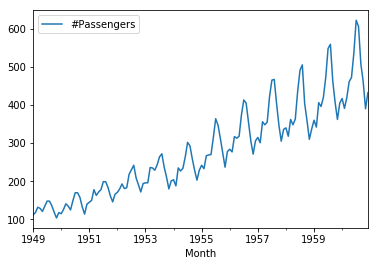

In [15]:
# Set date column as index
data.set_index('Month', inplace=True)

# Inspect data 
print(data.info())

# Plot data
data.plot()
plt.show()

### Compare annual stock price trends
We'll learn how to select sub-periods from a time series to compare the performance for three years of Yahoo stock prices.

In [16]:
google = pd.read_csv('GOOGL.csv', parse_dates=['Date'], index_col='Date')
amd = pd.read_csv('AMD.csv', parse_dates=['Date'], index_col='Date')

In [17]:
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,313.788788,315.070068,312.432434,313.688690,313.688690,3908400
2010-01-05,313.903900,314.234222,311.081085,312.307312,312.307312,6003300
2010-01-06,313.243256,313.243256,303.483490,304.434448,304.434448,7949400
2010-01-07,305.005005,305.305298,296.621613,297.347351,297.347351,12815700
2010-01-08,296.296295,301.926941,294.849854,301.311310,301.311310,9439100


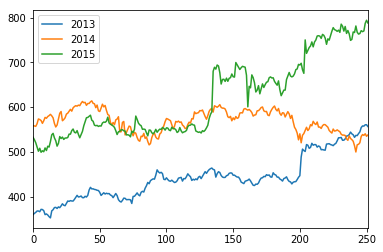

In [18]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = google.loc[year, ['Open']].reset_index(drop=True)    #partial indexing
    price_per_year.rename(columns={'Open': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot()

In [19]:
prices.head()

,2013,2014,2015
0,360.070068,558.288269,532.599976
1,362.827820,558.058044,527.150024
2,365.035034,557.062073,520.500000
3,368.093079,563.063049,510.950012
4,368.138153,573.573547,501.510010


### Set and change time series frequency

We will learn how to assign a frequency to a DateTimeIndex, and then change this frequency. 

* Note: If you want to do summarization, please use resample or groupby.

In [20]:
amd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2013 entries, 2010-01-04 to 2017-12-29
Data columns (total 6 columns):
Open         2013 non-null float64
High         2013 non-null float64
Low          2013 non-null float64
Close        2013 non-null float64
Adj Close    2013 non-null float64
Volume       2013 non-null int64
dtypes: float64(5), int64(1)
memory usage: 110.1 KB


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2917 entries, 2010-01-04 to 2017-12-29
Freq: D
Data columns (total 6 columns):
Open         2013 non-null float64
High         2013 non-null float64
Low          2013 non-null float64
Close        2013 non-null float64
Adj Close    2013 non-null float64
Volume       2013 non-null float64
dtypes: float64(6)
memory usage: 159.5 KB
None


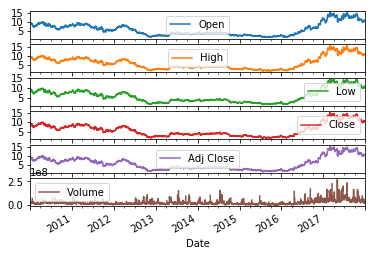

In [21]:
amd1 = amd.asfreq('D')
print(amd1.info())
# Plot the data
amd1.plot(subplots=True)
plt.show()

In [22]:
amd1.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,9.79,9.90,9.68,9.70,9.70,18748700.0
2010-01-05,9.71,9.90,9.68,9.71,9.71,22145700.0
2010-01-06,9.68,9.76,9.55,9.57,9.57,18643400.0
2010-01-07,9.51,9.55,9.18,9.47,9.47,26806800.0
2010-01-08,9.37,9.47,9.29,9.43,9.43,13752800.0
2010-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,9.38,9.44,9.08,9.14,9.14,23700100.0
2010-01-12,8.89,8.92,8.52,8.65,8.65,33387100.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95 entries, 2010-01-31 to 2017-11-30
Freq: M
Data columns (total 6 columns):
Open         67 non-null float64
High         67 non-null float64
Low          67 non-null float64
Close        67 non-null float64
Adj Close    67 non-null float64
Volume       67 non-null float64
dtypes: float64(6)
memory usage: 5.2 KB
None


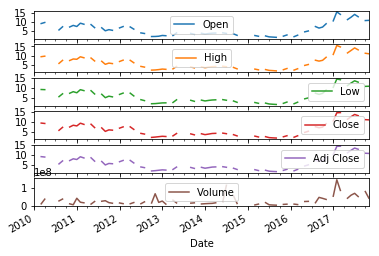

In [23]:
amd2 = amd.asfreq('M')
print(amd2.info())
# Plot the data
amd2.plot(subplots=True)
plt.show()

In [24]:
amd2.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-28,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-31,9.15,9.44,9.13,9.27,9.27,12850100.0
2010-04-30,9.72,9.72,9.06,9.07,9.07,37974900.0
2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-30,7.58,7.65,7.30,7.32,7.32,26406200.0
2010-07-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-31,5.69,5.80,5.57,5.61,5.61,28571000.0
2010-09-30,7.39,7.44,6.99,7.11,7.11,38514800.0


## Lags, changes, and returns for stock price series
Basic time series calculation:
* Shift or lag values back or forward back in time.
* Get the difference in a value for a given period of time.
* Compute the percent change over any number of periods.

pandas built in methods rely on pd.DateTimeIndex

### Shifting stock prices across time
1. Method to manipulate time series using .shift(), which allows you shift all values in a Series or DataFrame by a number of periods to a different time along the DateTimeIndex.

Let's use this to visually compare a stock price series for Google shifted 90 business days into both past and future.

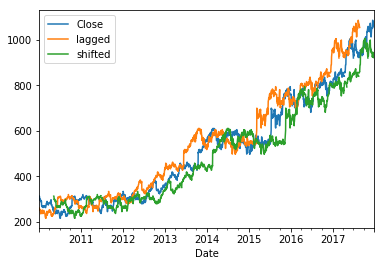

In [25]:
# Import data here
google = pd.read_csv('GOOGL.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(periods=-90)
google['shifted'] = google.Close.shift(periods=90)

# Plot the google price series
google[['Close','lagged','shifted']].plot()
plt.show()

In [26]:
google.head(10)

,Open,High,Low,Close,Adj Close,Volume,lagged,shifted
Date,,,,,,,,
2010-01-04,313.788788,315.070068,312.432434,313.688690,313.688690,3908400.0,261.086090,NaN
2010-01-05,313.903900,314.234222,311.081085,312.307312,312.307312,6003300.0,254.779785,NaN
2010-01-06,313.243256,313.243256,303.483490,304.434448,304.434448,7949400.0,252.947952,NaN
2010-01-07,305.005005,305.305298,296.621613,297.347351,297.347351,12815700.0,255.695694,NaN
2010-01-08,296.296295,301.926941,294.849854,301.311310,301.311310,9439100.0,254.019012,NaN
2010-01-11,302.532532,302.532532,297.317322,300.855865,300.855865,14411300.0,254.239243,NaN
2010-01-12,299.124115,299.379395,294.294281,295.535522,295.535522,9696800.0,249.434433,NaN
2010-01-13,288.533539,294.484497,287.237244,293.838837,293.838837,12980200.0,247.462463,NaN
2010-01-14,292.242249,297.397400,291.696686,295.220215,295.220215,8471700.0,237.742737,NaN


### Calculating stock price changes
We'll learn to calculate returns using current and shifted prices as input. Now we'll practice a similar calculation to calculate absolute changes from current and shifted prices, and compare the result to the function .diff().

In [27]:
# Import data here
google = pd.read_csv('GOOGL.csv', parse_dates=['Date'], index_col='Date')

# Created shifted_30 here
google['shifted_30'] = google.Open.shift(30)

# Subtract shifted_30 from price
google['change_30'] = google['Open'] - google['shifted_30']

# Get the 30-day price difference
google['diff_30'] = google.Open.diff(30)

# Inspect the last five rows of price
print(google.tail())


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-12-22  1070.000000  1071.719971  1067.640015  1068.859985  1068.859985   
2017-12-26  1068.640015  1068.859985  1058.640015  1065.849976  1065.849976   
2017-12-27  1066.599976  1068.270020  1058.380005  1060.199951  1060.199951   
2017-12-28  1062.250000  1064.839966  1053.380005  1055.949951  1055.949951   
2017-12-29  1055.489990  1058.050049  1052.699951  1053.400024  1053.400024   

             Volume   shifted_30  change_30    diff_30  
Date                                                    
2017-12-22   889400  1048.000000  22.000000  22.000000  
2017-12-26   918800  1043.869995  24.770020  24.770020  
2017-12-27  1116200  1040.800049  25.799927  25.799927  
2017-12-28   994200  1037.719971  24.530029  24.530029  
2017-12-29  1180300  1035.000000  20.489990  20.489990  


### Plotting multi-period returns
The last time series method that we'll learn is .pct_change(). Let's use this function to calculate returns for various calendar day periods, and plot the result to compare the different patterns.

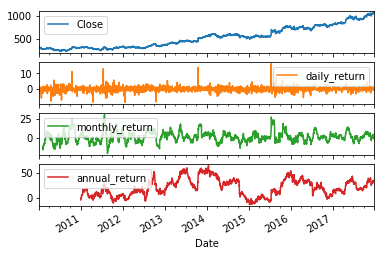

In [28]:
# Import data here
google = pd.read_csv('GOOGL.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('D')

# Create daily_return
google['daily_return'] = google.Close.pct_change(1).mul(100)

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(30).mul(100)

# Create annual_return
google['annual_return'] = google.Close.pct_change(360).mul(100)

# Plot the result
google[['Close','daily_return','monthly_return','annual_return']].plot(subplots=True)
plt.show()

# Great Job!